<a href="https://colab.research.google.com/github/Vah1d/ADM-HW2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESEARCH QUESTIONS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [5]:
data_profiles = pd.read_csv('/content/drive/MyDrive/ADM/instagram_profiles.csv.zip', delimiter='\t')

In [ ]:
data_profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [ ]:
data_profiles.profile_id.dropna(inplace = True)
data_profiles.is_business_account.fillna(False, inplace=True)
data_profiles = data_profiles.fillna(0)
data_profiles.isna().sum()

sid                    0
profile_id             0
profile_name           0
firstname_lastname     0
description            0
following              0
followers              0
n_posts                0
url                    0
cts                    0
is_business_account    0
dtype: int64

## [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

#### - Plot the number of posts for each profile in descending order.

In [ ]:
post_sort = data_profiles.sort_values(by = 'n_posts', ascending = False)
confronto_prof = post_sort[['profile_name','n_posts']]
confronto_prof.head(10)

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
2207897,waxking911,117099.0
4313908,gamt_official,113780.0
4219476,collarosedw_official,113182.0
4236057,gamt_authentic,112777.0
1631526,ivankkkka.trmp,112723.0


#### - What posts have the highest number of "likes"?

In [ ]:
#data_posts = pd.read_csv('instagram_posts.csv.zip',usecols = ['post_id','description','numbr_likes','number_comments'], delimiter='\t', nrows = 2000000)
#likes_sort = data_posts.sort_values(by = 'numbr_likes', ascending = False)
#confronto_post = likes_sort[['post_id','description','numbr_likes']]
#confronto_post.head(10)

top_rows = []
for chunk in pd.read_csv('instagram_posts.csv.zip',usecols = ['post_id','description','numbr_likes','number_comments'], 
                         delimiter='\t', chunksize=500000):
    chunk_top = chunk.sort_values(by='numbr_likes', ascending=False).head(5)
    top_rows.append(chunk_top)

ParserError: Error tokenizing data. C error: out of memory

#### - What posts have the most and the least number of comments?

In [ ]:
comments_up_sort = data_posts.sort_values(by = 'number_comments', ascending = False)
comments_down_sort = data_posts.sort_values(by = 'number_comments', ascending = True)

confronto_comments_up = (comments_up_sort[['post_id','description','number_comments']].head(10)).style.set_caption('posts with the most comments')
confronto_comments_down = (comments_down_sort[['post_id','description','number_comments']].head(10)).style.set_caption('posts with the least comments')

display(confronto_comments_up)
display(confronto_comments_down)

,post_id,description,number_comments
242837,BQ_N0bzhTSL,🍔🍟❤️,135221
1228385,BT29eW-BHMn,صباح الخير يا مدلل 🕊,116551
1758104,BLWvTOwhChG,السحب على مجوهرات كارتيه ، هدايا عربون الحب مني لكل شخص وقف عند البوتيك وعبر عن رايه الجميل بالعطر .. حيكون يوم الاحد ب بـ اذن الله .. تابعونا يومها ع السناب تشات 💪🏽✨,70722
579112,BmORc4znzzA,Party in the castle with @benefitcosmetics 🎉 \n_____________\nFiesta en el castillo 🎉😍 #MarialeNoPara,56686
313806,BxrapKyCgg0,Склав присягу.,53878
377722,Bbz6IBXhKgg,"Спасибо вам за все! Всех обнял! Я дома, все норм ;) 🙏🏾🙌🏾",32505
50077,BuvfTmgFsuY,"COMPETITION CLOSED. The winner is @abbie__williams! #MobFridayGiveaway.🍾🍋🍏 HUGE @fentimansltd giveaway - a massive gin and tonic prize up for grabs. To win this huge array Gin and Fentiman's flavoured mixers, just:\n1. Tag your mates who love a g and t! Each new tagged friend counts as a new entry so go wilddddddddd.\n2. Follow @mobkitchenuk 🍾\n3. Follow @fentimansltd 🍋\nYou’ve gotta be over 18 for this one folks. Winner decided Monday. Good luck. #MobKitchen#competition #giveaway #prize #fentimans",31655
1319985,BtERQw2ALrk,Yeni kaplanım “Cesur” 🐯,29662
1188069,BaO_mhzlyeI,New security / nueva seguridad 😍,29361
712304,Bq-INRTlPhO,Cheguei em Muzumuia com a melhor recepção de todas! Mais um ano aprendendo sobre o Amor! ❤🙏 @fraternidadesemfronteiras @andreimoreira,26386


,post_id,description,number_comments
0,BXdjjUlgcgq,Wreckloose! Deevalley bike park laps on the @intensecycles recluse!\n@alfjonescycles \n@saddleback_ltd \n#deevalleybikepark #northwalestrails #ridemoremtb #recluse #bikes #cycling #mtb #bikepark #gopro,0
1575589,BdAXok1FarK,🍁,0
722848,ByH2o2EBgeX,Love reexploring this beautiful and historic city all these years later. The intersection of history and modernity is an incredible thing to experience. \n#doctorsofinstagram #somedocs @somedocs,0
722849,ByHz1JXIiNA,Barcelona\n#aidamomente #aida#aidanova,0
722850,ByHoBcjnOyU,스페인 바로셀로나 1 #스페인 #바로셀로나 #spain #barcelona,0
722851,ByHlpcdJwJG,nan,0
722852,ByGrDNuCLtM,nan,0
722854,ByGg0EfD8oF,"Откуда у тебя вообще убеждение, что бывают «другие разы»? «Раз» – это по определению что-то одно. А второго раза, второго шанса даже в сказках не бывает. Это будет уже совсем другая сказка, если будет вообще!",0
722856,ByGYU0RpoM6,nan,0
722858,ByGIP_lCWpl,nan,0


#### - How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

#### - How many posts include only photos? How many also have videos?

In [ ]:
print('{} posts include only photos'.format(sum(data_posts['post_type'] == 1)))
print('{} posts include both photos and videos'.format(sum(data_posts['post_type'] == 3)))

940326 posts include only photos
3 posts include both photos and videos


#### - What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [ ]:
n = len(data_profiles)

print('{0:.2%} of accounts are business accounts'.format((sum(data_profiles['is_business_account'] == True)/n)))
print('{0:.2%} of accounts are non-business accounts'.format((sum(data_profiles['is_business_account'] == False)/n)))

18.97% of accounts are business accounts
81.03% of accounts are non-business accounts


We see how the vast majority of instagram accounts analyzed are non-business accounts (81.03%). The purpose of business acccounts is that of gaining access to promote posts and statistics about your followers, this gives us reason to believe that the majority of instagram users isn't interested in growing a following for monetary reasons, opposed to just having a profile to share their personal life.

## [RQ3] Now it's important to understand the most common times in which users publish their posts. 

In [3]:
import adm2

#### - What is the most common time in which users publish their posts?

In [2]:
help(adm2.common_time)

Help on function common_time in module adm2:

common_time(chunksize=5000)
    RQ3
    description:
        1) What is the most common time in which users publish their posts?
    params:
        - chunksize: size of dataset to compute.
    output:
        the most common time interval and number of posts in that interval



In [3]:
adm2.common_time()

20:00:00 - 20:59:59: 313 posts


#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [4]:
help(adm2.plot_intervals_posts)

Help on function plot_intervals_posts in module adm2:

plot_intervals_posts(intervals, chunksize=5000)
    RQ3
    description:
        2) Plot the number of posts for each given time interval.
    params:
        - intervals: list of time intervals;
        - chunksize: size of dataset to compute.
    output:
        plot with the number of posts for each given interval.



#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

**Initial time 	Final time**  
**06:00:00 	10:59:59**  
**14:00:00 	16:59:59**  
**20:00:00 	23:59:59**  
**00:00:00 	02:59:59**  
**03:00:00 	05:59:59**  

Number of posts in time interval:
1 interval: 06:00:00 - 10:59:59 => 7319 posts
2 interval: 11:00:00 - 13:59:59 => 6345 posts
3 interval: 14:00:00 - 16:59:59 => 7728 posts
4 interval: 17:00:00 - 19:59:59 => 8598 posts
5 interval: 20:00:00 - 23:59:59 => 10368 posts
6 interval: 00:00:00 - 02:59:59 => 5172 posts
7 interval: 03:00:00 - 05:59:59 => 4468 posts


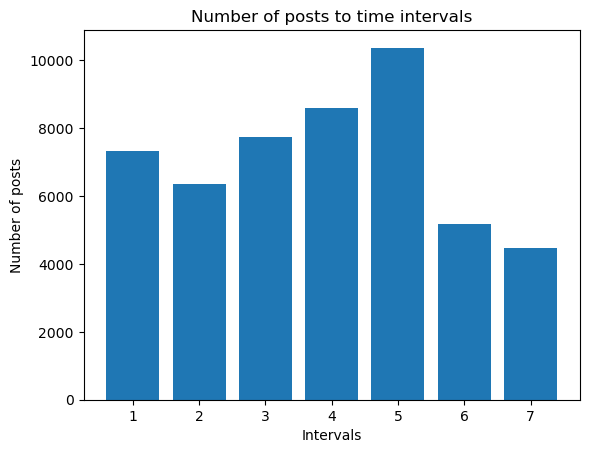

In [4]:
intervals = [
            ['06:00:00', '10:59:59'],
            ['11:00:00', '13:59:59'],
            ['14:00:00', '16:59:59'],
            ['17:00:00', '19:59:59'],
            ['20:00:00', '23:59:59'],
            ['00:00:00', '02:59:59'],
            ['03:00:00', '05:59:59']
]
adm2.plot_intervals_posts(intervals, 50000)

## [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

#### - Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [6]:
help(adm2.findPostsByProfileId)

Help on function findPostsByProfileId in module adm2:

findPostsByProfileId(profile_id, chunksize=5000)
    RQ4
    description:
        1) Searching the posts by user (profile_id).
    params:
        - profile_id: user profile id;
        - chunksize: size of dataset to compute.
    return:
        posts that belong to the given profile_id or message about its absence.



In [7]:
# profile that doesn't have any posts
adm2.findPostsByProfileId(223794779)

Profile ID: 223794779 => profile does not have any posts


In [8]:
# profile that has posts
adm2.findPostsByProfileId(2237947779)

Profile ID: 2237947779 => 1 posts


,post_id,profile_id,cts,post_type,description,numbr_likes,number_comments
0,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0


#### - Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [9]:
help(adm2.posts_of_top_profiles)

Help on function posts_of_top_profiles in module adm2:

posts_of_top_profiles(n, chunksize=5000)
    description:
        Searching for top n profiles' posts.
    params:
        - n: number of top profiles;
        - chunksize: size of dataset to compute.
    return:
        posts of top n profiles.



In [10]:
adm2.posts_of_top_profiles(2, 10000)

Profile ID: 4048041553 => 32 posts
Profile ID: 1475495653 => 27 posts


,post_id,profile_id,cts,post_type,description,numbr_likes,number_comments
5289,Bie10T0ATk8,4048041553,2018-05-07 17:51:07.000,1,Don't forget to use a KLAFS sauna after your w...,51,0
5290,BiMg_vhA5EX,4048041553,2018-04-30 15:02:51.000,1,There is nothing better than a KLAFS sauna wit...,49,0
5293,Bx974UqAe8c,4048041553,2019-05-27 15:31:28.000,1,Enjoy in the most extraordinary hotel - right ...,42,2
5300,BgiugHxFCN7,4048041553,2018-03-20 12:01:23.000,1,Forest sauna with tree trunk panelling on the ...,49,0
5301,BdR1Z8wDf0D,4048041553,2017-12-29 09:00:26.000,1,KLAFS cold plunges are an excellent way of coo...,50,0
5302,BpT9hxkFBuJ,4048041553,2018-10-24 12:06:37.000,1,Everyone deserves moments of pure relaxation. ...,44,0
5303,BjcVYMXnPKY,4048041553,2018-05-31 15:00:35.000,1,KLAFS sauna you will never forget! âºï¸ #kal...,43,0
5304,BqFd6T6FaSE,4048041553,2018-11-12 16:32:22.000,1,During a winter getaway at Sportresidenz Zille...,43,0
5305,BiUeEuqAo1c,4048041553,2018-05-03 17:11:15.000,1,Sauna with illuminated and integrated salt wal...,39,1
5307,Bx2HdSAgWLr,4048041553,2019-05-24 14:38:43.000,1,The charming sauna house Wassermann in Tannhei...,36,0


#### - What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [11]:
help(adm2.top_profiles_average_likes_and_comments)

Help on function top_profiles_average_likes_and_comments in module adm2:

top_profiles_average_likes_and_comments(n, chunksize=5000)
    description:
        Searching the average of likes and comments per profile in top n profiles list.
    params:
        - n: number of top profiles;
        - chunksize: size of dataset to compute.
    output:
        information about:
        - total number of likes of the top n profiles;
        - total number of comments of the top n profiles;
        - the average of likes and comments per profile in top n profiles list.



In [12]:
adm2.top_profiles_average_likes_and_comments(10, 100000)

Profile ID: 195747313 => 41 posts
Profile ID: 4048041553 => 32 posts
Profile ID: 3137983884 => 31 posts
Profile ID: 9163884725 => 30 posts
Profile ID: 53113992 => 30 posts
Profile ID: 5343183789 => 30 posts
Profile ID: 3656684547 => 29 posts
Profile ID: 3561993587 => 29 posts
Profile ID: 276454303 => 29 posts
Profile ID: 5337907015 => 29 posts
total number of likes: 15339
total number of comments: 510
average of likes and comments per profile in top 10 list: 1584.9


#### - Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [5]:
intervals
import adm2

In [6]:
adm2.top_profiles_posts_by_intervals_plot(intervals, 1000)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 808572

## [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

#### - Plot the top 10 most popular users in terms of followers and their number of posts.

#### - Who is the most influential user?

#### - Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

#### - How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

#### - How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

## [RQ6] It's time to get information from the user posting effectiveness.

#### - What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

#### - Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

#### - What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

#### - Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

#### - Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

#### - Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

#### - What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

#### - What are histograms, bar plots, scatterplots and pie charts used for?

#### - What insights can you extract from a Box Plot?

## Bonus points

Up to this point, you probably have worked with one or two files simultaneously. Nevertheless, for the literals a. and b. of this section, you must work with the three datasets at the same time. Note that performing some of these operations might be too complex for your pc specs. For this reason, we suggest you make use of AWS (yeah! only a suggestion). In case you need it, in the following links you can find the same three files already mounted into AWS for you to work with them easily (instagram_posts, instagram_profiles, instagram_locations).

#### a. Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

#### b. Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

#### c. Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

# Command Line Question

Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also does not use as much CPU processing time as other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

In this question, you should use command line tools such as grep and possibly other commands to answer the following question:

#### Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)

Note: You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable.
Algorithmic Question

# ALGORITHMIC QUESTION

## [AQ1] Given the following pseudocode, answer the questions:

Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)

#### - What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

#### - What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

#### - Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

## [AQ2] Considering the following problem, answer the questions:

Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

Each piece of the cut should have an integer length
He should at least cut the ribbon once
The multiplication of the length of all the pieces be the maximum possible

#### 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [65]:
def cut_the_ribbon(arr, index, N, decreaser, output = False):
    """
    description:
        Brute forcing all lenghts of pieces. in a way that fulfils the following three conditions:
        1)Each piece of the cut should have an integer length.
        2) He should at least cut the ribbon once.
        3) The multiplication of the length of all the pieces be the maximum possible.
    params:
        - arr: an array that is intialized with [0] * N;
        - index: current index of element in the sequence of lenght of pieces;
        - N: total lenght of the ribbon;
        - decreaser: temporary variable that is containing the value (step) decreasing of last element in the sequence;
        - output: flag to output information about each iteration, e.g. "[sequence] => result_of_multiplication".
    output:
        all possible combinations of lengths of pieces of the ribbon.
    """
    # finish of the computing
    if (decreaser < 0):
        return
    # return to the previous step if decreaser reach its limit 
    elif (decreaser == 0):
        mult = 1
        # output 
        for i in range(index):
            mult *= arr[i]
            if output: print(arr[i], end = " ")
        if output: print(f"result of multiplication => {mult}")
        mults.append
        return
    
    # initialization of the first piece's length
    if(index == 0): prev = 1
    # initialization of rest of the pieces (theirs lenghts)
    else: prev = arr[index - 1]
 
    # recursion for brute forcing lengths of pieces (start searching combinations from the end)
    # e.g. N = 3, [1, 1, 1] => [1, 2] => [3]
    # e.g. N = 5, [1, 1, 1, 1, 1] => [1, 1, 1, 2] => [1, 1, 3] => [1, 2, 2] => [1, 4] => [2, 3] => [5]
    for k in range(prev, N + 1):
        arr[index] = k
        cut_the_ribbon(arr, index + 1, N, decreaser - k, output)

In [72]:
N = 7
max_mult = 1
arr = [0] * N
cut_the_ribbon(arr, 0, N, N, True)

1 1 1 1 1 1 1 => 1
1 1 1 1 1 2 => 2
1 1 1 1 3 => 3
1 1 1 2 2 => 4
1 1 1 4 => 4
1 1 2 3 => 6
1 1 5 => 5
1 2 2 2 => 8
1 2 4 => 8
1 3 3 => 9
1 6 => 6
2 2 3 => 12
2 5 => 10
3 4 => 12
7 => 7


#### 2-4. Show that the algorithm has exponential running time. Compute its running-time complexity. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it

In [35]:
import time
from matplotlib import pyplot as plt

In [36]:
def build_time_complexity_plot(start = 2, end = 25):
    """
    description:
        Building the plot of time complexity of the algorithm.
    params:
        - start: start of range of Ns
        - end: end of range of Ns
    output:
        plot of time complexity of the algorithm.
    """
    times = []
    Ns = range(start, end + 1)
    for N in Ns:
        start = time.time()
        arr = [0] * N
        cut_the_ribbon(arr, 0, N, N)
        end = time.time()
        times.append(end - start)
    #print(times)
    for n, t in zip(Ns, times):
        print(f"N = {n} => {t} ms")
    plt.plot(Ns, times)

N = 2 => 0.0 ms
N = 3 => 0.0 ms
N = 4 => 0.0 ms
N = 5 => 0.0 ms
N = 6 => 0.0 ms
N = 7 => 0.0 ms
N = 8 => 0.0 ms
N = 9 => 0.0 ms
N = 10 => 0.0 ms
N = 11 => 0.008038520812988281 ms
N = 12 => 0.0 ms
N = 13 => 0.0 ms
N = 14 => 0.004656314849853516 ms
N = 15 => 0.003565549850463867 ms
N = 16 => 0.00832676887512207 ms
N = 17 => 0.008440732955932617 ms
N = 18 => 0.010004758834838867 ms
N = 19 => 0.013406515121459961 ms
N = 20 => 0.01930975914001465 ms
N = 21 => 0.03172922134399414 ms
N = 22 => 0.03171539306640625 ms
N = 23 => 0.040170907974243164 ms
N = 24 => 0.05044221878051758 ms
N = 25 => 0.07060003280639648 ms
N = 26 => 0.08172988891601562 ms
N = 27 => 0.11818599700927734 ms
N = 28 => 0.15106511116027832 ms
N = 29 => 0.1937251091003418 ms
N = 30 => 0.2896993160247803 ms
N = 31 => 0.3568451404571533 ms
N = 32 => 0.40492892265319824 ms
N = 33 => 0.5618743896484375 ms
N = 34 => 0.7077512741088867 ms
N = 35 => 0.9053084850311279 ms
N = 36 => 1.1775734424591064 ms
N = 37 => 1.3323118686676025 

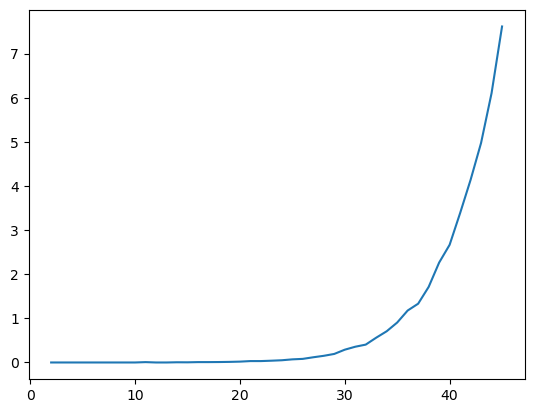

In [38]:
build_time_complexity_plot(2, 45)

By using bigger length of 

N = 2 => 0.0 ms
N = 3 => 0.0 ms
N = 4 => 0.0 ms
N = 5 => 0.0 ms
N = 6 => 0.0 ms
N = 7 => 0.0 ms
N = 8 => 0.0 ms
N = 9 => 0.0 ms
N = 10 => 0.0 ms
N = 11 => 0.008038520812988281 ms
N = 12 => 0.0 ms
N = 13 => 0.0 ms
N = 14 => 0.004656314849853516 ms
N = 15 => 0.003565549850463867 ms
N = 16 => 0.00832676887512207 ms
N = 17 => 0.008440732955932617 ms
N = 18 => 0.010004758834838867 ms
N = 19 => 0.013406515121459961 ms
N = 20 => 0.01930975914001465 ms
N = 21 => 0.03172922134399414 ms
N = 22 => 0.03171539306640625 ms
N = 23 => 0.040170907974243164 ms
N = 24 => 0.05044221878051758 ms
N = 25 => 0.07060003280639648 ms
N = 26 => 0.08172988891601562 ms
N = 27 => 0.11818599700927734 ms
N = 28 => 0.15106511116027832 ms
N = 29 => 0.1937251091003418 ms
N = 30 => 0.2896993160247803 ms
N = 31 => 0.3568451404571533 ms
N = 32 => 0.40492892265319824 ms
N = 33 => 0.5618743896484375 ms
N = 34 => 0.7077512741088867 ms
N = 35 => 0.9053084850311279 ms
N = 36 => 1.1775734424591064 ms
N = 37 => 1.3323118686676025 

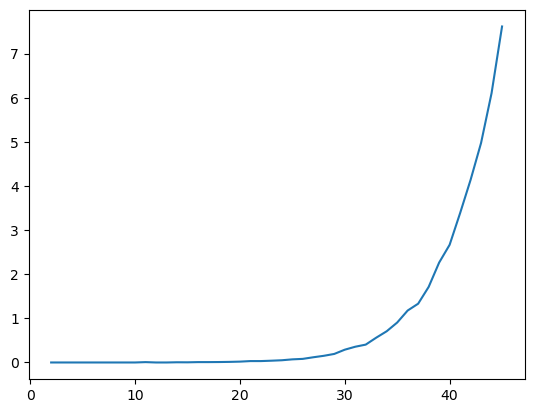

In [38]:
build_time_complexity_plot(2, 45)

That algorithm has exponential running time, because it has brute-force concept in it.
With each additional operation (n+1) we are doubling our time of computing in case of using recursion.